In [1]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['AAPL', 'GOOG', 'BAC', 'WTW', 'PCRX', 'LOW', 'CRM']

In [34]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np
import requests

DATA_TIMEZONE = pytz.timezone("EST")

def get_trading_dates(today):
    """
    Returns the dates for the latest 9 trading days
    """
    url = "https://query1.finance.yahoo.com/v7/finance/chart/X?period1={:.0f}&period2={:.0f}"\
          "&interval=1d&includeTimestamps=true".format((today - timedelta(days=20)).timestamp(), today.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']        

    result = chart['result'][0]
    start = datetime.fromtimestamp(result['timestamp'][-9], tz=DATA_TIMEZONE)
    end = datetime.fromtimestamp(result['timestamp'][-1], tz=DATA_TIMEZONE).replace(hour=16, minute=0)
    return start, end
            
get_trading_dates(datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0))

(datetime.datetime(2017, 2, 16, 9, 30, tzinfo=<StaticTzInfo 'EST'>),
 datetime.datetime(2017, 3, 1, 16, 0, tzinfo=<StaticTzInfo 'EST'>))

In [39]:
def get_data(symbol, start_date, end_date, raw_response=False):
        
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start_date.timestamp(), end_date.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']
        
    if chart['error']:
        print(chart['error'])

    result = chart['result'][0]
    if raw_response:
        return result
    data = result['indicators']['quote'][0]
    data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
    df = pd.DataFrame(data)
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
start, end = get_trading_dates(today)
dd = get_data("GOOG", start, end)
dd

,close,high,low,open,time,volume
0,819.500061,819.869995,819.479980,819.479980,2017-02-16 09:30:00-05:00,0.0
1,819.516052,819.989990,819.516052,819.989990,2017-02-16 09:31:00-05:00,12727.0
2,819.169983,819.169983,819.169983,819.169983,2017-02-16 09:32:00-05:00,2114.0
3,820.333374,820.333374,819.849976,819.849976,2017-02-16 09:33:00-05:00,4418.0
4,820.950012,820.950012,820.259949,820.259949,2017-02-16 09:34:00-05:00,8730.0
5,821.974976,822.019958,821.051025,821.051025,2017-02-16 09:35:00-05:00,14493.0
6,822.439880,822.439880,822.001038,822.001038,2017-02-16 09:36:00-05:00,16352.0
7,822.099976,822.099976,821.880005,822.099976,2017-02-16 09:37:00-05:00,11620.0
8,822.200012,822.300049,822.200012,822.300049,2017-02-16 09:38:00-05:00,7764.0
9,822.499939,822.499939,822.239990,822.400024,2017-02-16 09:39:00-05:00,8592.0


In [40]:
dd_len = len(dd)
dd['avg9days'] = dd.volume.rolling(window=dd_len, min_periods=1).mean()
dd['current_score'] = dd.volume / dd.avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

,close,high,low,open,time,volume,avg9days,current_score,rolling_score
0,819.500061,819.869995,819.479980,819.479980,2017-02-16 09:30:00-05:00,0.0,0.000000,NaN,NaN
1,819.516052,819.989990,819.516052,819.989990,2017-02-16 09:31:00-05:00,12727.0,6363.500000,2.000000,2.000000
2,819.169983,819.169983,819.169983,819.169983,2017-02-16 09:32:00-05:00,2114.0,4947.000000,0.427330,1.213665
3,820.333374,820.333374,819.849976,819.849976,2017-02-16 09:33:00-05:00,4418.0,4814.750000,0.917597,1.114976
4,820.950012,820.950012,820.259949,820.259949,2017-02-16 09:34:00-05:00,8730.0,5597.800000,1.559541,1.226117
5,821.974976,822.019958,821.051025,821.051025,2017-02-16 09:35:00-05:00,14493.0,7080.333333,2.046938,1.390281
6,822.439880,822.439880,822.001038,822.001038,2017-02-16 09:36:00-05:00,16352.0,8404.857143,1.945542,1.482825
7,822.099976,822.099976,821.880005,822.099976,2017-02-16 09:37:00-05:00,11620.0,8806.750000,1.319442,1.459484
8,822.200012,822.300049,822.200012,822.300049,2017-02-16 09:38:00-05:00,7764.0,8690.888889,0.893349,1.388717
9,822.499939,822.499939,822.239990,822.400024,2017-02-16 09:39:00-05:00,8592.0,8681.000000,0.989748,1.344387


In [41]:
import threading
import queue


def get_data_parallel(symbols, start_date, end_date):    
    max_threads = 100
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_data(*args, raw_response=True)
            result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock, start_date, end_date))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    today = end_date.date()
    while True:
        try:
            result = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            raw_data = result['indicators']['quote'][0]
            raw_data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
            data = pd.DataFrame(raw_data)
            data['symbol'] = result['meta']['symbol']            
            data_len = len(data)
            data['avg9days'] = data.volume.rolling(window=data_len, min_periods=1).mean()
            data['current_score'] = data.volume / data.avg9days
            data['rolling_score'] = data.current_score.rolling(window=data_len, min_periods=1).mean() 
            data['time'] = data.time.dt.tz_convert(LOCAL_TZ)
            todays_data = data[data.time.dt.date == today]
            
            if df is None:
                df = todays_data
            else:
                df = df.append(todays_data, ignore_index=True)            
            
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
LOCAL_TZ = 'America/Los_Angeles'
start, end = get_trading_dates(today)
all_dd = get_data_parallel(get_stocks(), start, end)
all_dd

,close,high,low,open,time,volume,symbol,avg9days,current_score,rolling_score
0,829.119995,829.849976,828.574951,828.574951,2017-03-01 06:30:00-08:00,49776.0,GOOG,3783.642271,13.155578,1.028646
1,829.769958,829.769958,829.489990,829.500061,2017-03-01 06:31:00-08:00,13555.0,GOOG,3787.129550,3.579228,1.029556
2,829.410889,830.000000,829.410889,830.000000,2017-03-01 06:32:00-08:00,12170.0,GOOG,3790.120228,3.210980,1.030335
3,828.520020,829.284973,828.520020,829.284973,2017-03-01 06:33:00-08:00,8499.0,GOOG,3791.799572,2.241416,1.030767
4,827.729980,828.099976,827.729980,828.099976,2017-03-01 06:34:00-08:00,9377.0,GOOG,3793.790731,2.471670,1.031281
5,827.729980,827.820007,827.729980,827.820007,2017-03-01 06:35:00-08:00,8457.0,GOOG,3795.452602,2.228193,1.031707
6,829.248779,829.369995,829.248779,829.369995,2017-03-01 06:36:00-08:00,8884.0,GOOG,3797.265408,2.339578,1.032173
7,829.289978,829.289978,829.080017,829.080017,2017-03-01 06:37:00-08:00,5367.0,GOOG,3797.824430,1.413177,1.032309
8,829.919983,829.919983,829.619995,829.849976,2017-03-01 06:38:00-08:00,11314.0,GOOG,3800.500178,2.976977,1.033002
9,829.679993,829.809998,829.679993,829.809998,2017-03-01 06:39:00-08:00,7234.0,GOOG,3801.722064,1.902822,1.033311


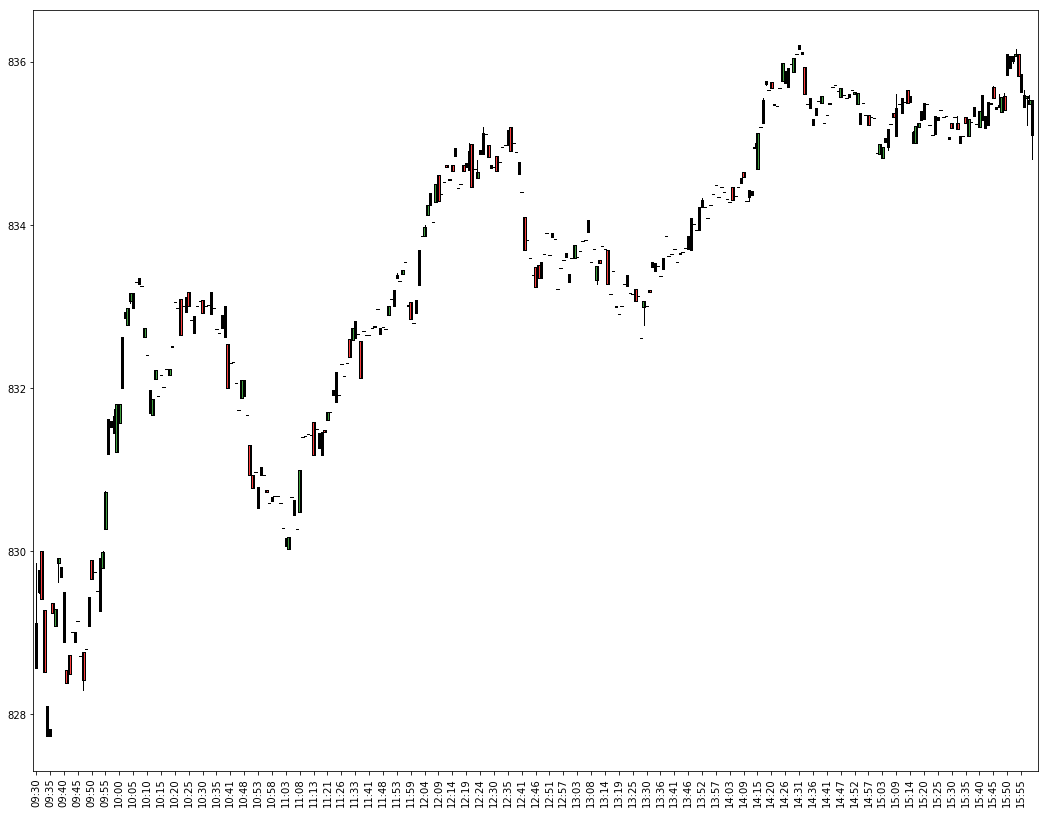

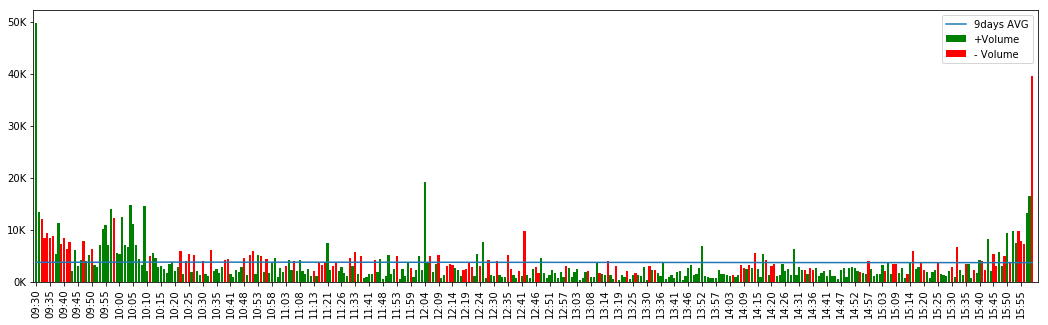

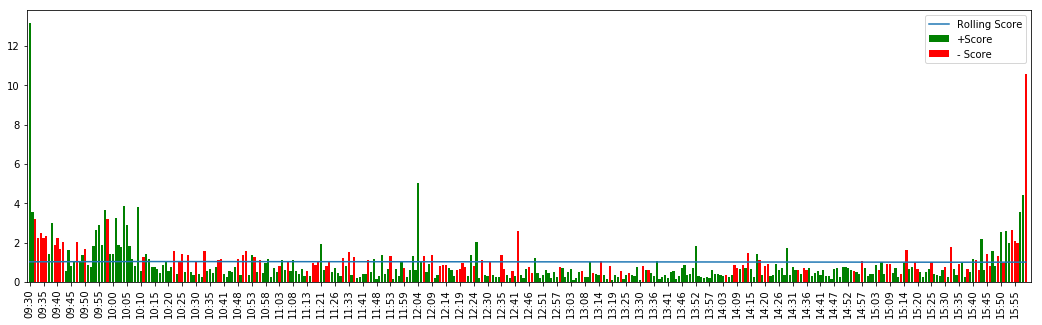

In [42]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

last_date = dd.time.max()
last_day_data = dd[dd.time.dt.date == last_date.date()]
display_charts(last_day_data)

1. WTW 12:59PM: Rolling Score 1.9953804846942642, Current Score 6.21730937891595


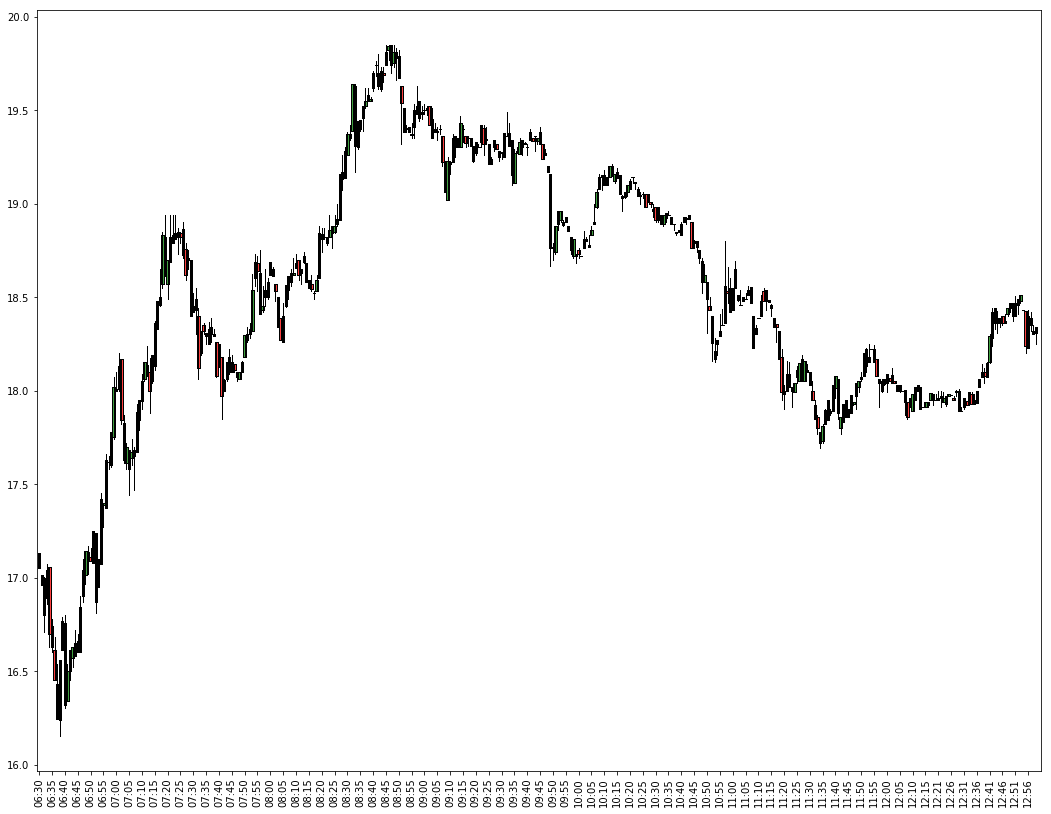

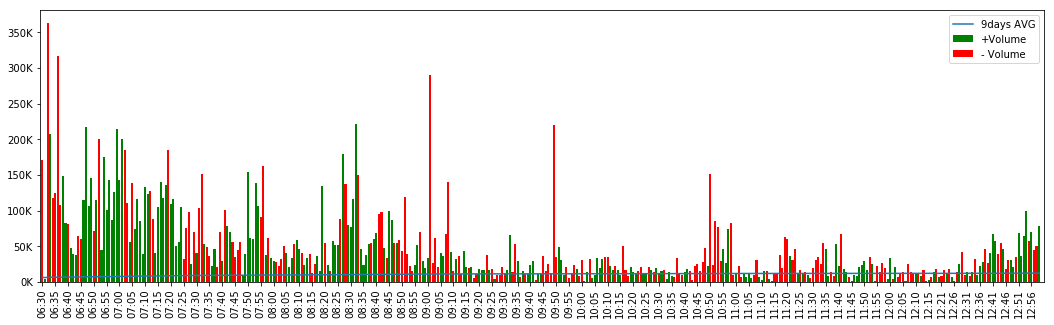

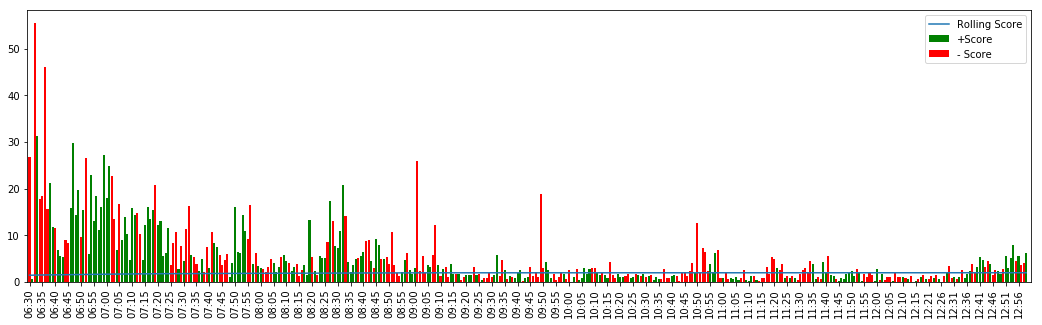

2. PCRX 12:59PM: Rolling Score 1.5618299038089285, Current Score 8.856806286733836


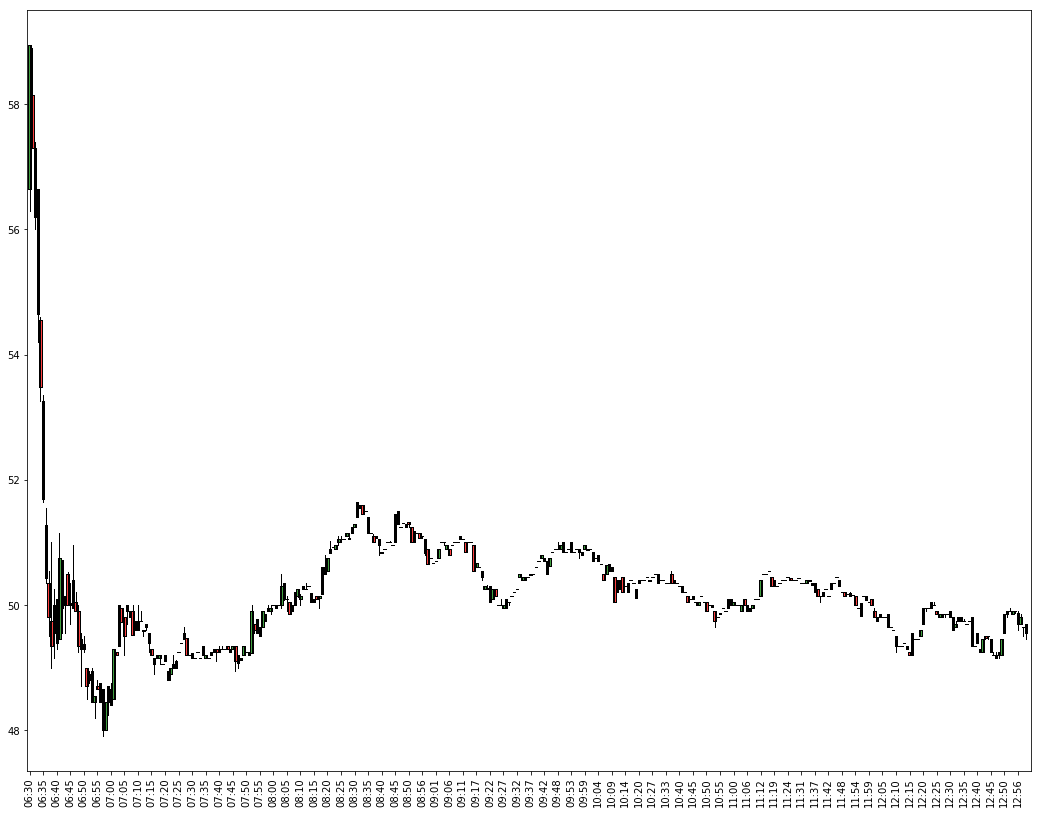

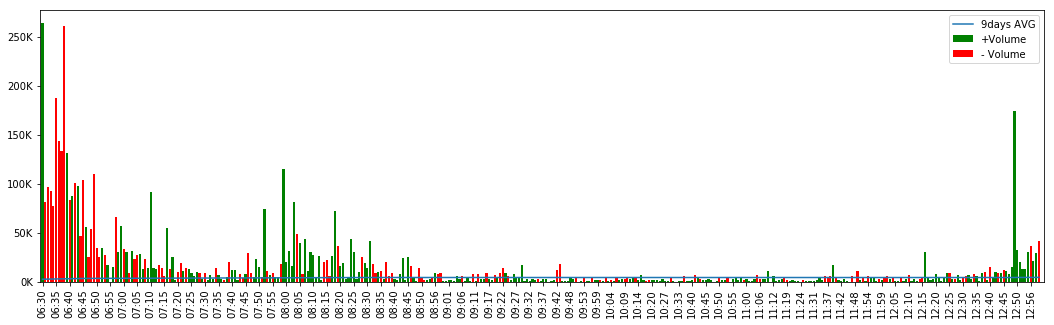

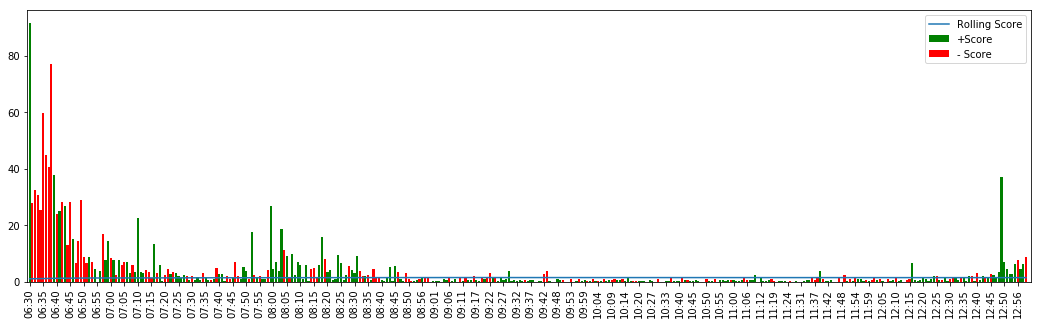

3. LOW 12:59PM: Rolling Score 1.4137763463637192, Current Score 7.10623861117133


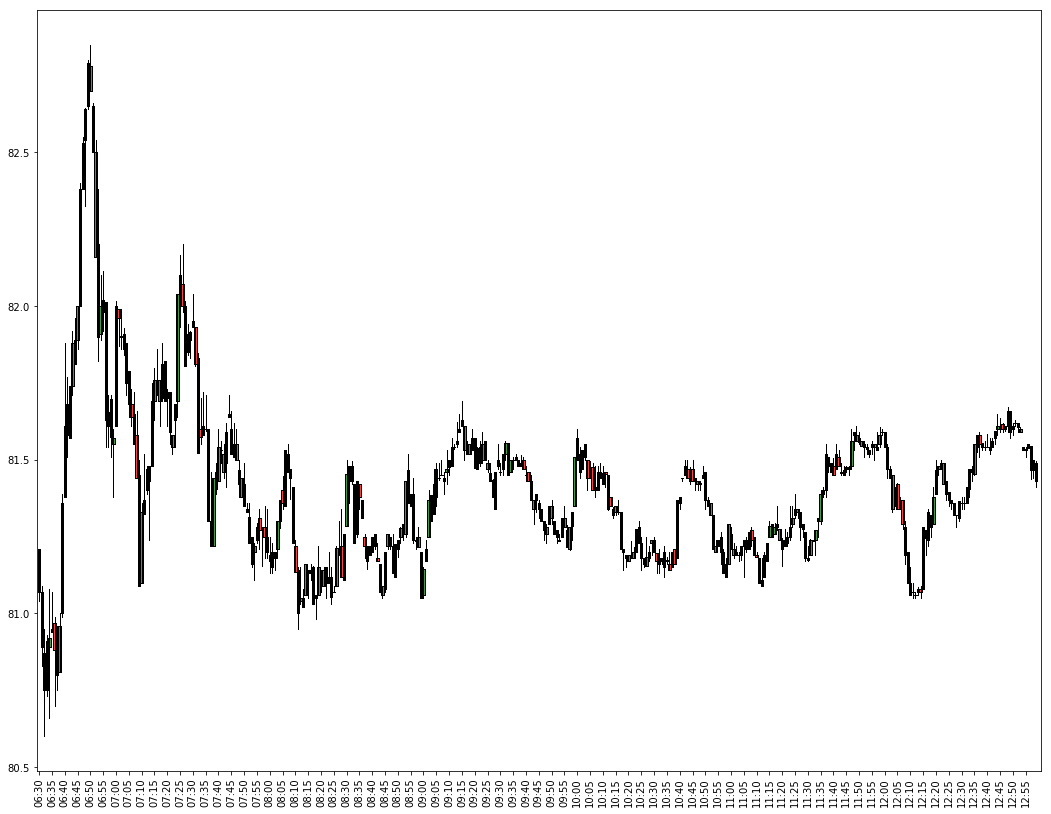

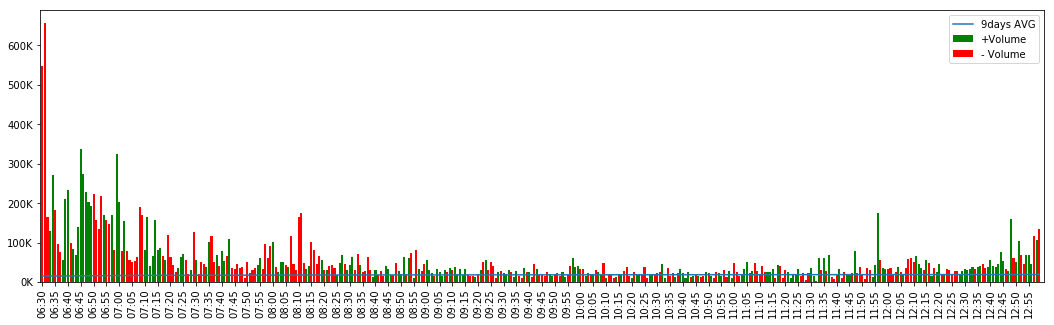

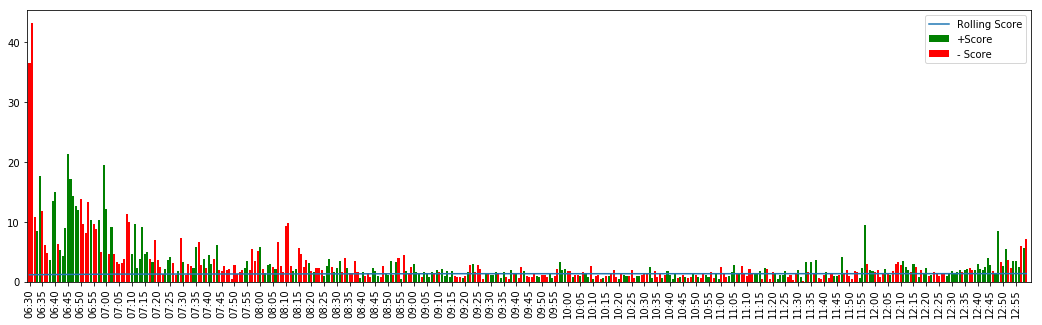

4. CRM 12:59PM: Rolling Score 1.2548730435569178, Current Score 14.442193770303842


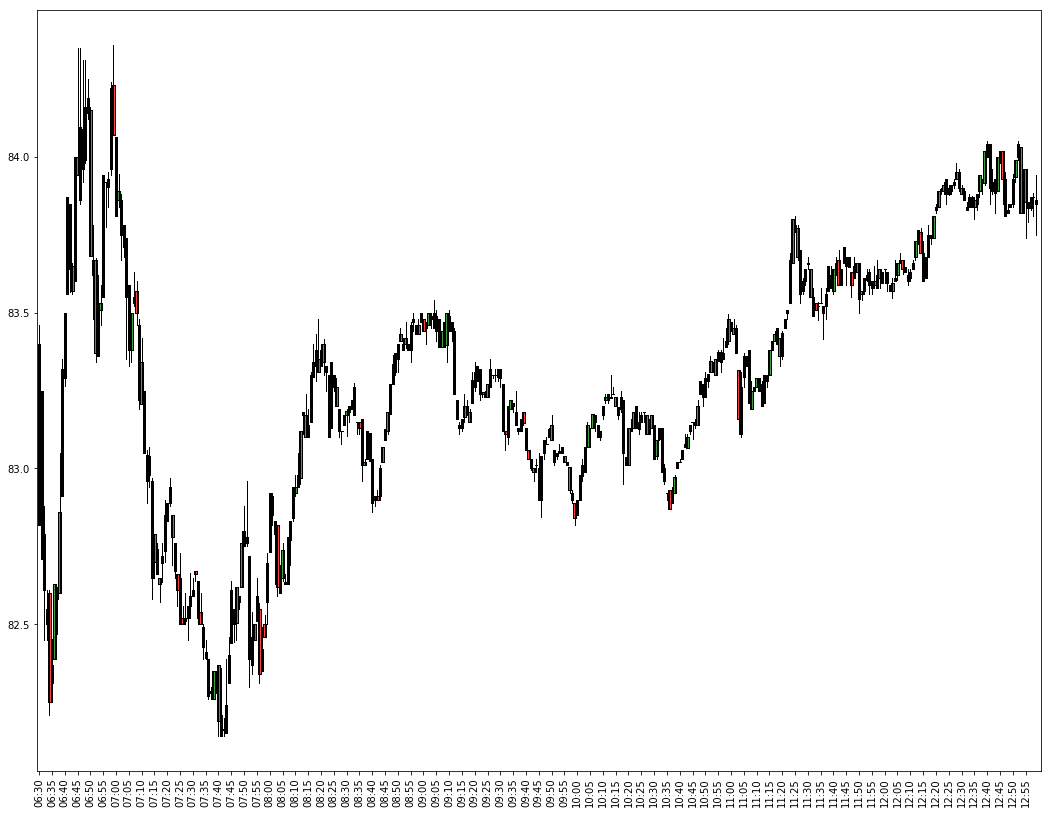

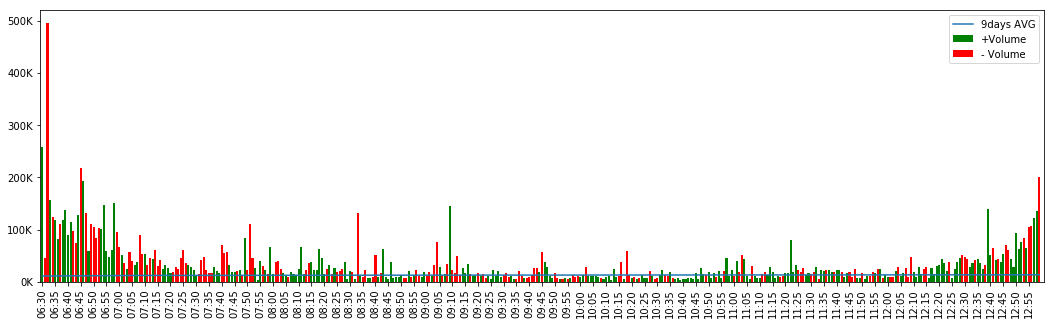

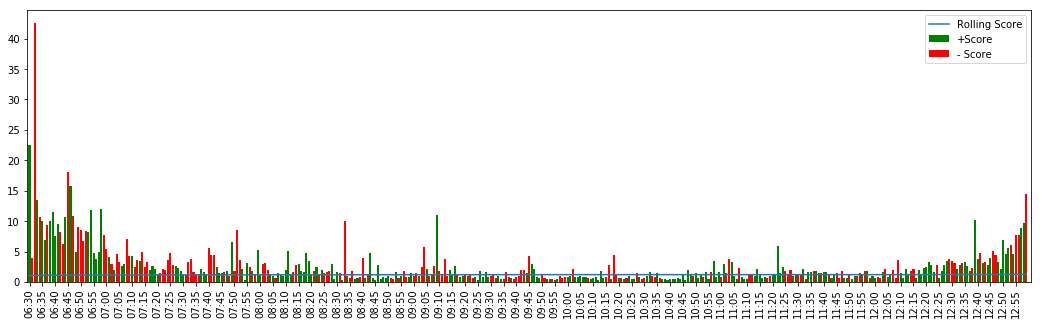

5. GOOG 12:59PM: Rolling Score 1.0154421785616987, Current Score 10.583373695112275


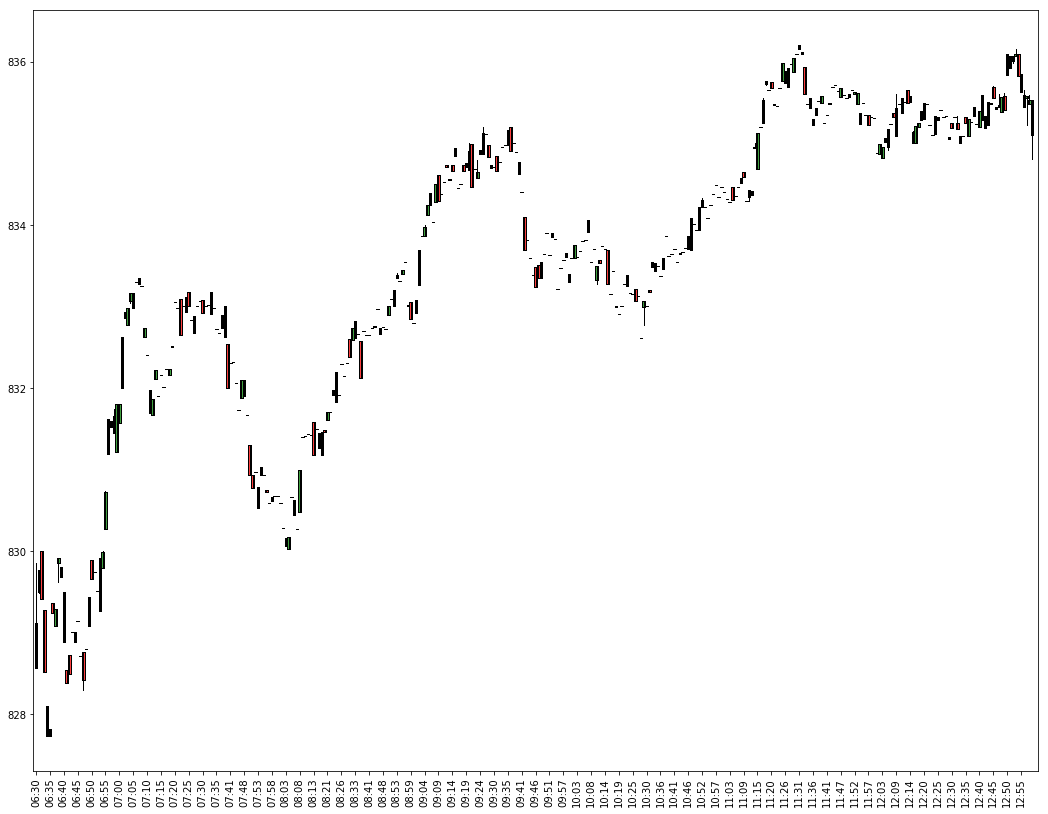

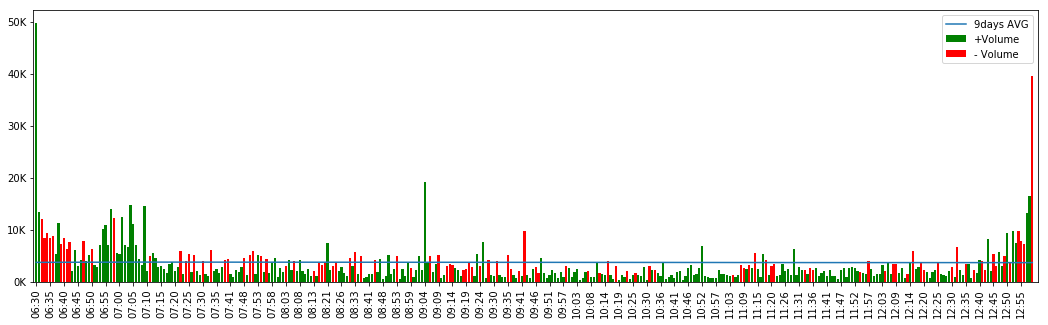

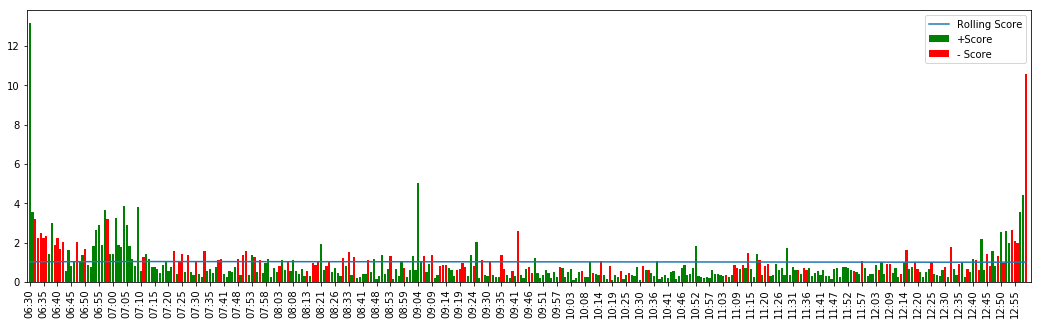

6. BAC 12:59PM: Rolling Score 0.9793782749686185, Current Score 7.404644354858624


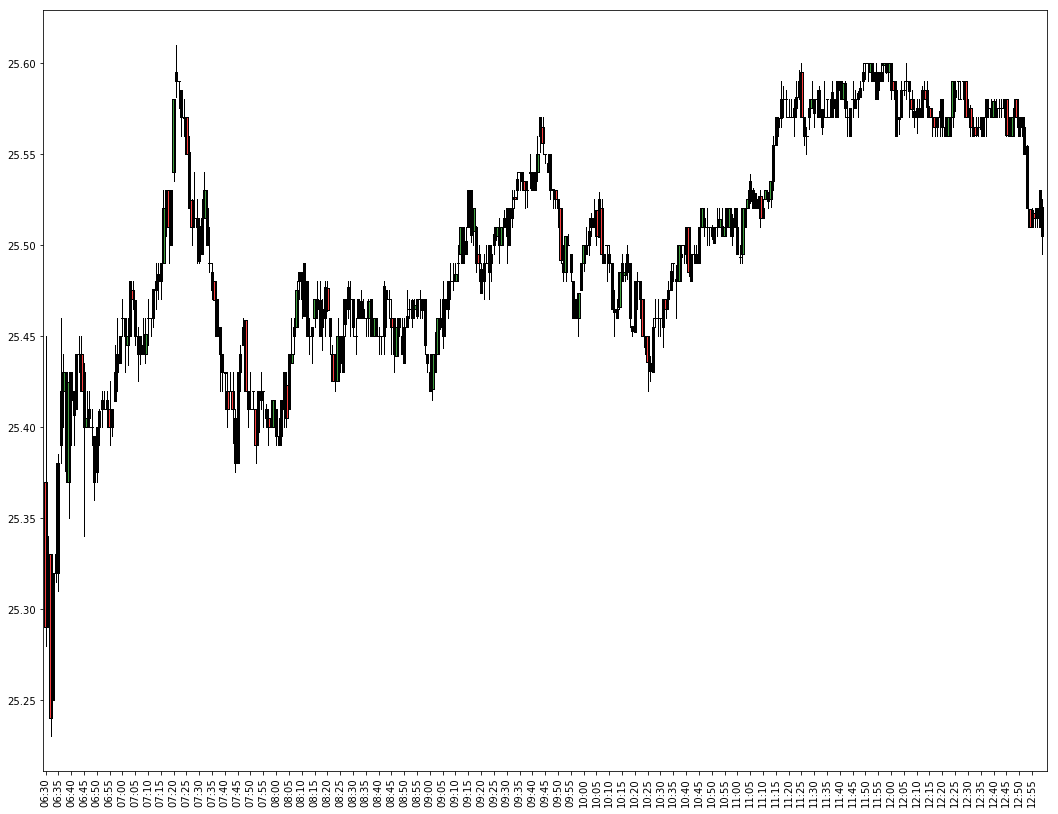

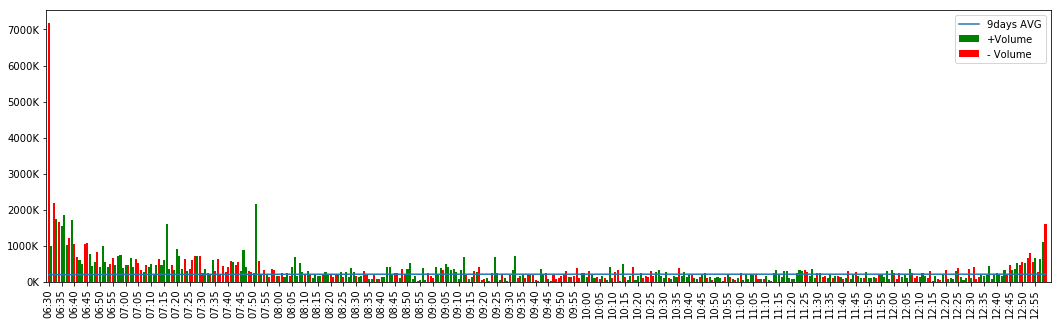

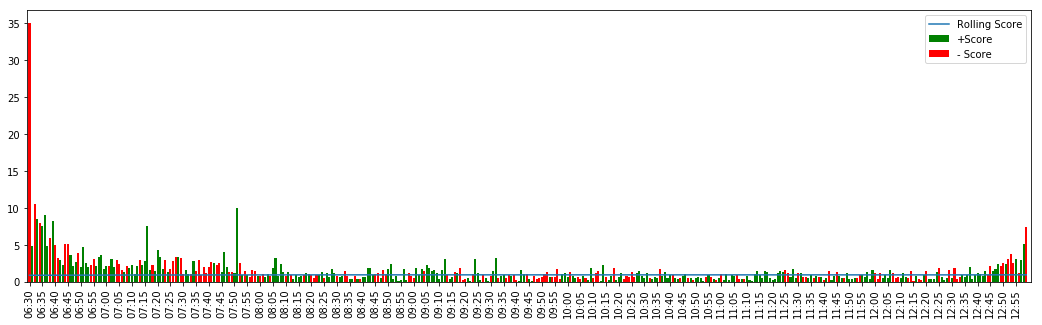

7. AAPL 12:59PM: Rolling Score 0.7441180815285036, Current Score 0.1644334262139229


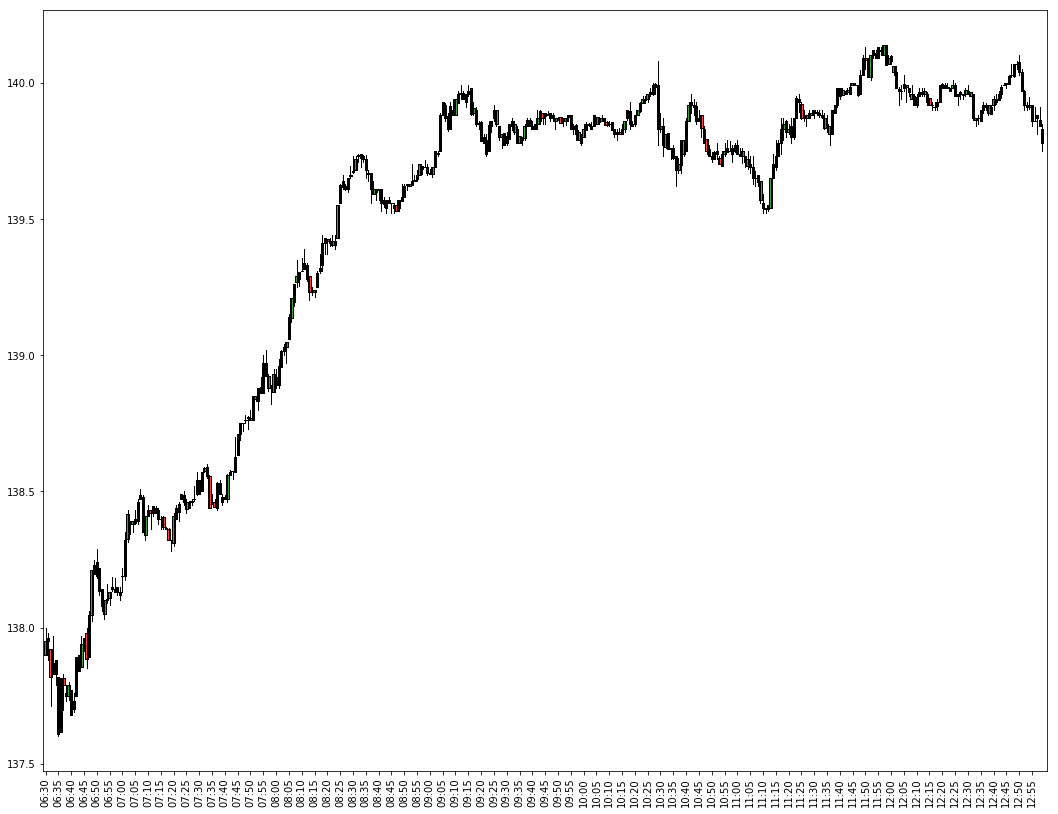

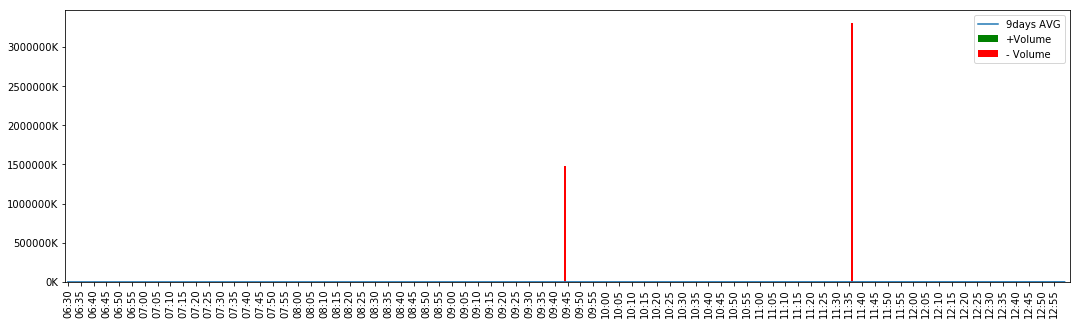

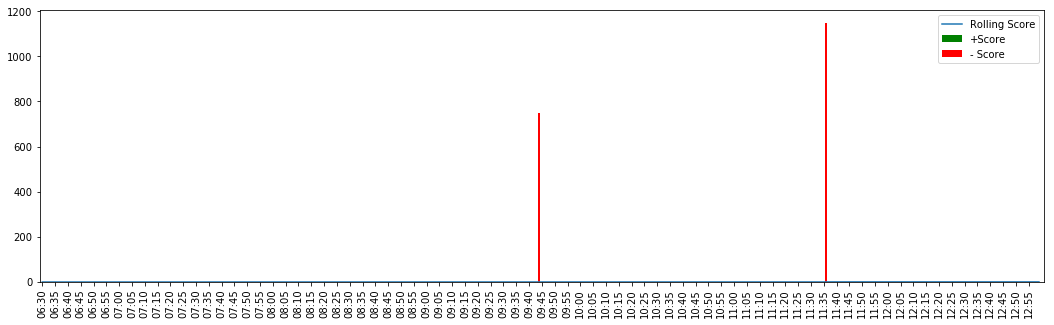

1. CRM 12:59PM: Rolling Score 1.2548730435569178, Current Score 14.442193770303842


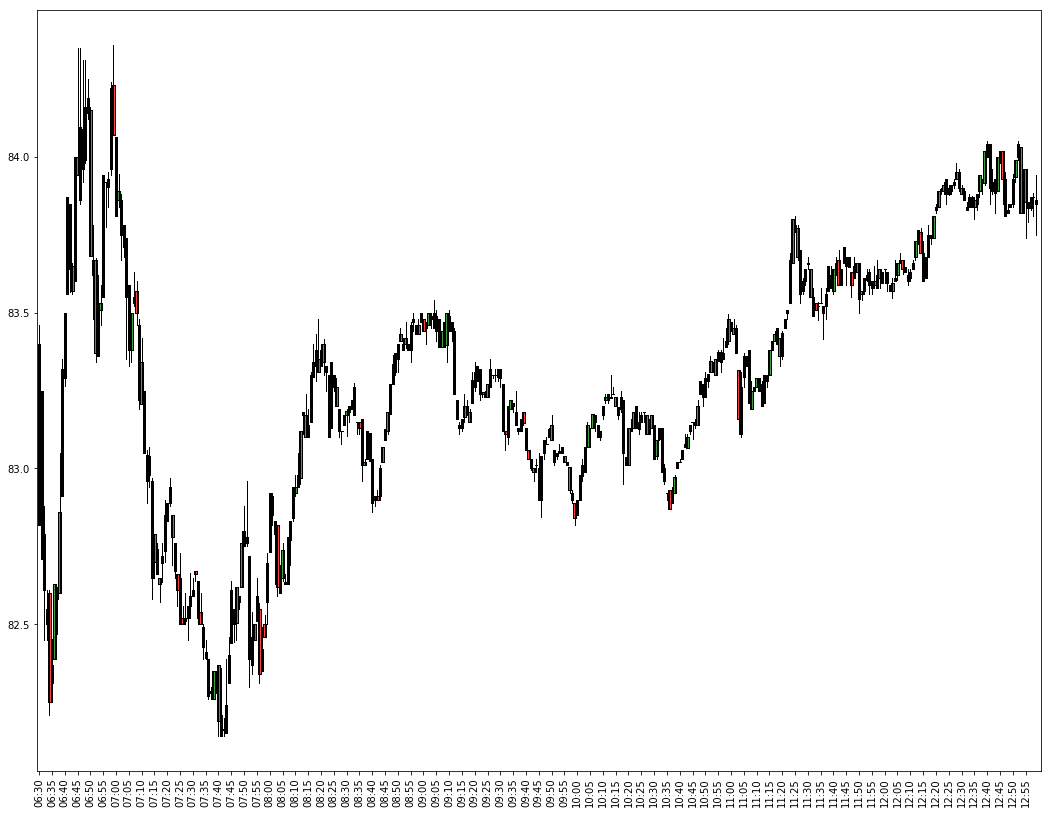

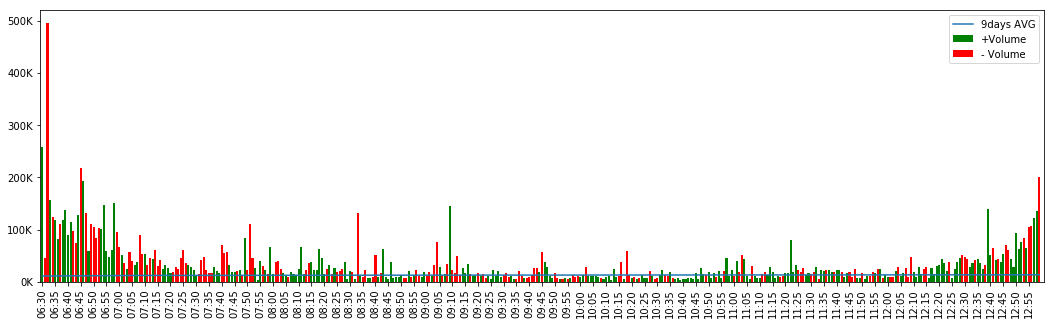

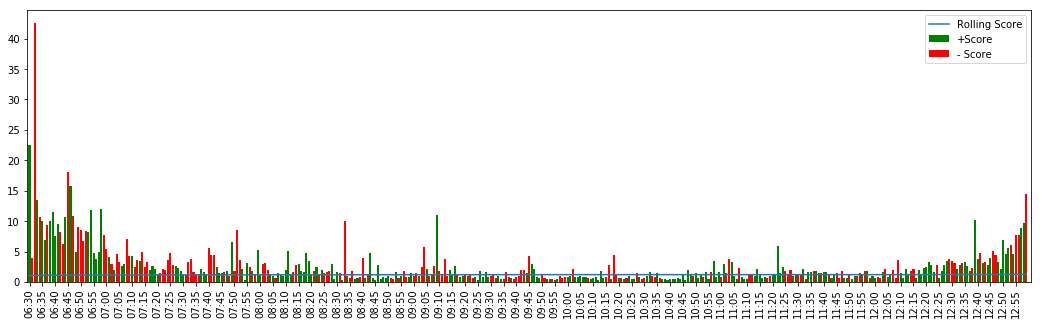

2. GOOG 12:59PM: Rolling Score 1.0154421785616987, Current Score 10.583373695112275


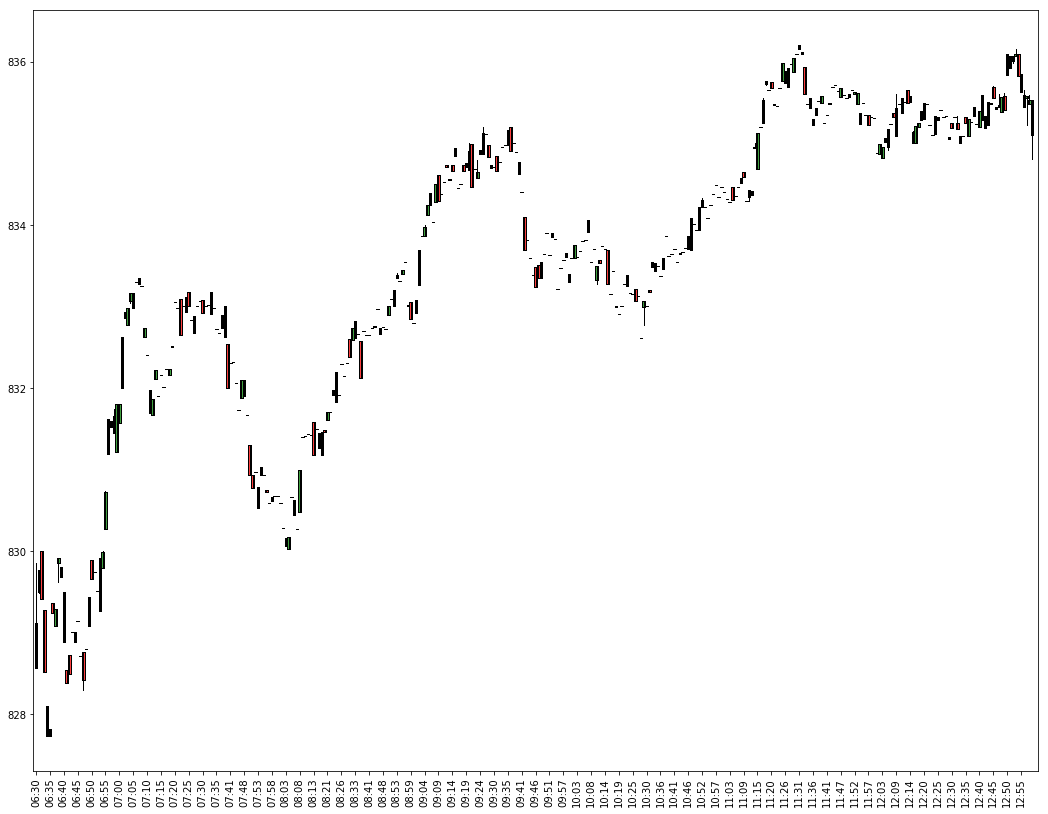

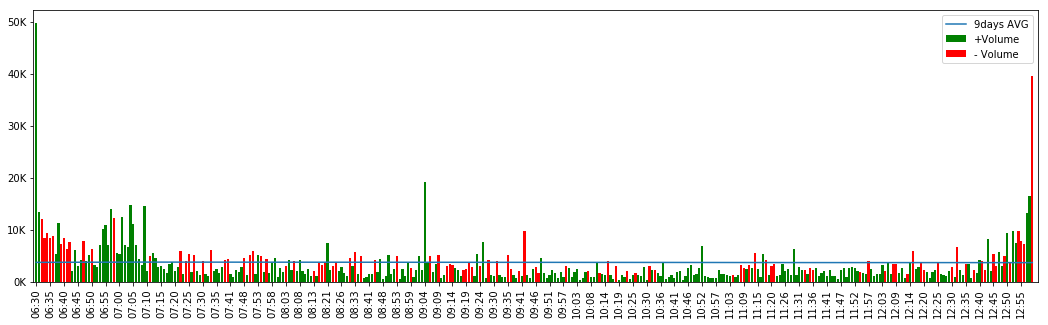

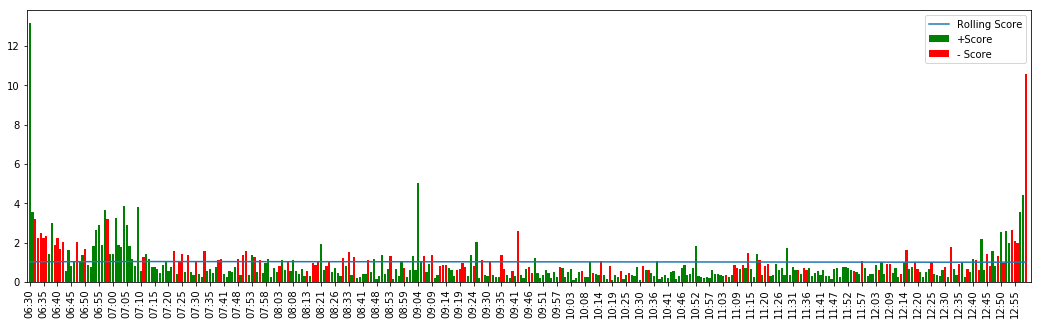

3. PCRX 12:59PM: Rolling Score 1.5618299038089285, Current Score 8.856806286733836


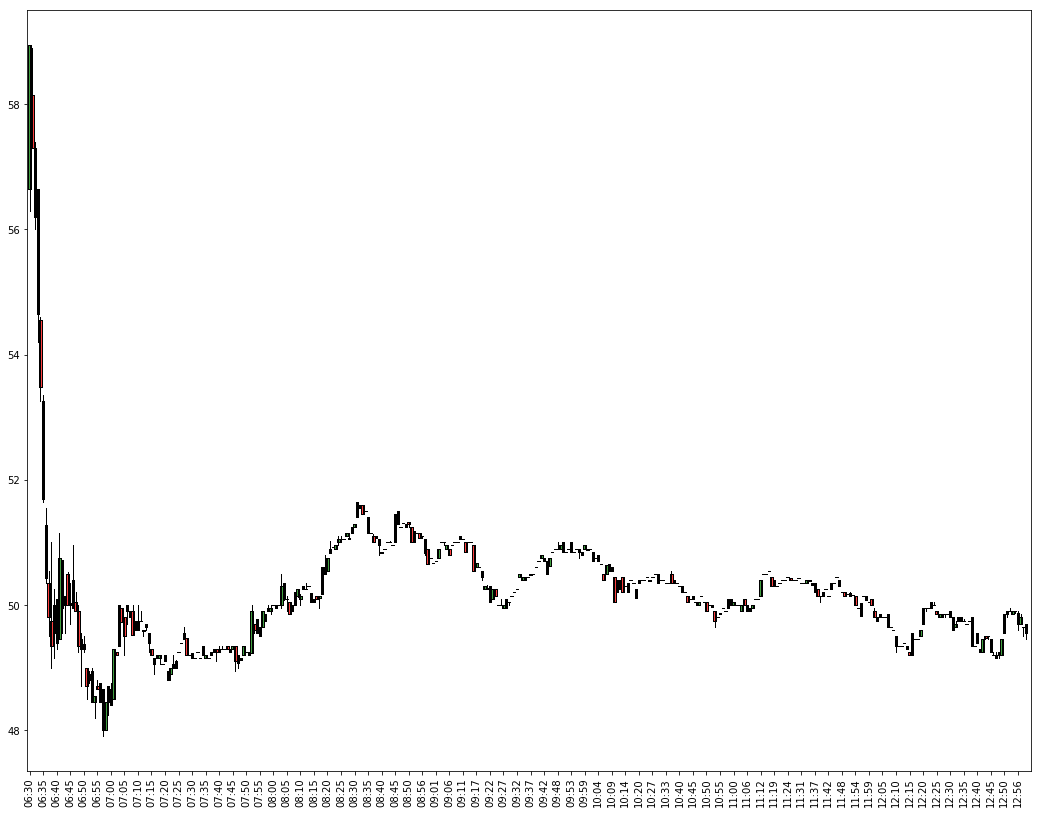

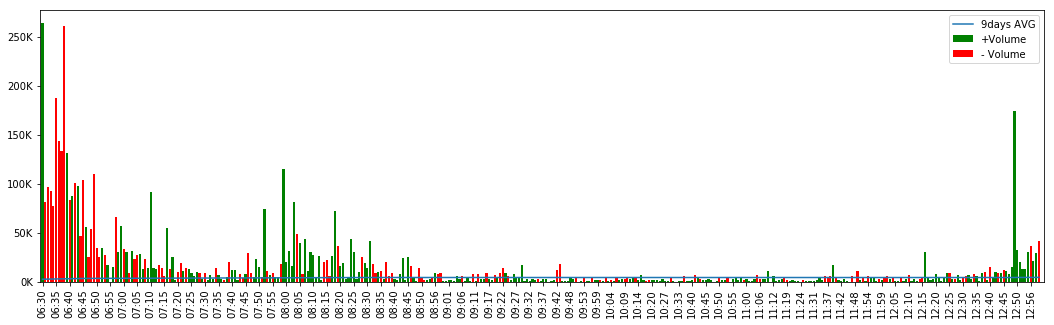

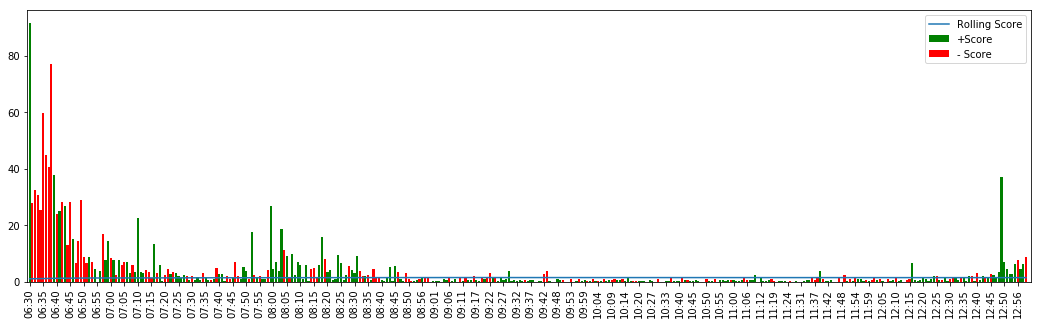

4. BAC 12:59PM: Rolling Score 0.9793782749686185, Current Score 7.404644354858624


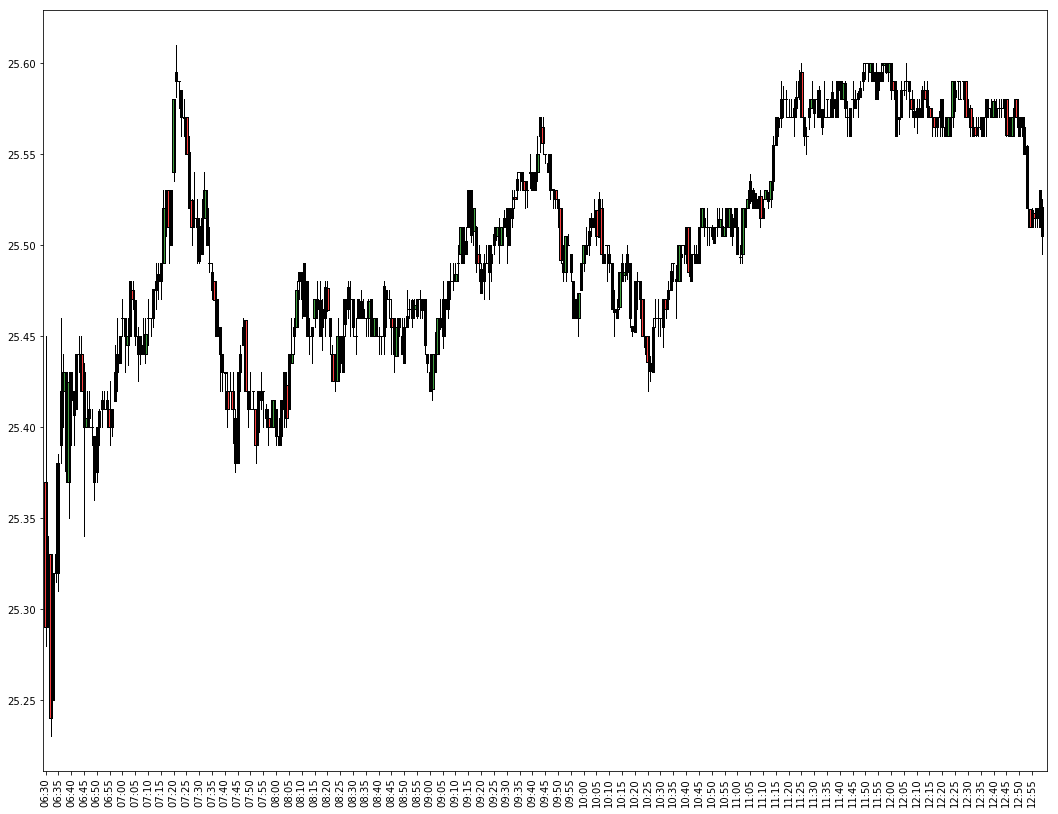

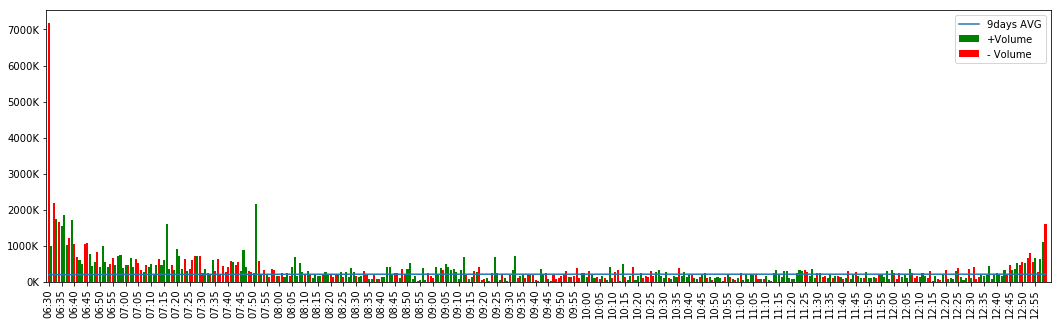

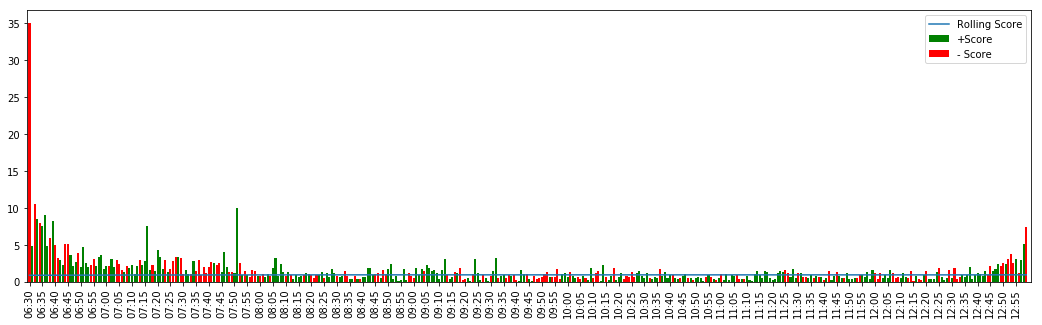

5. LOW 12:59PM: Rolling Score 1.4137763463637192, Current Score 7.10623861117133


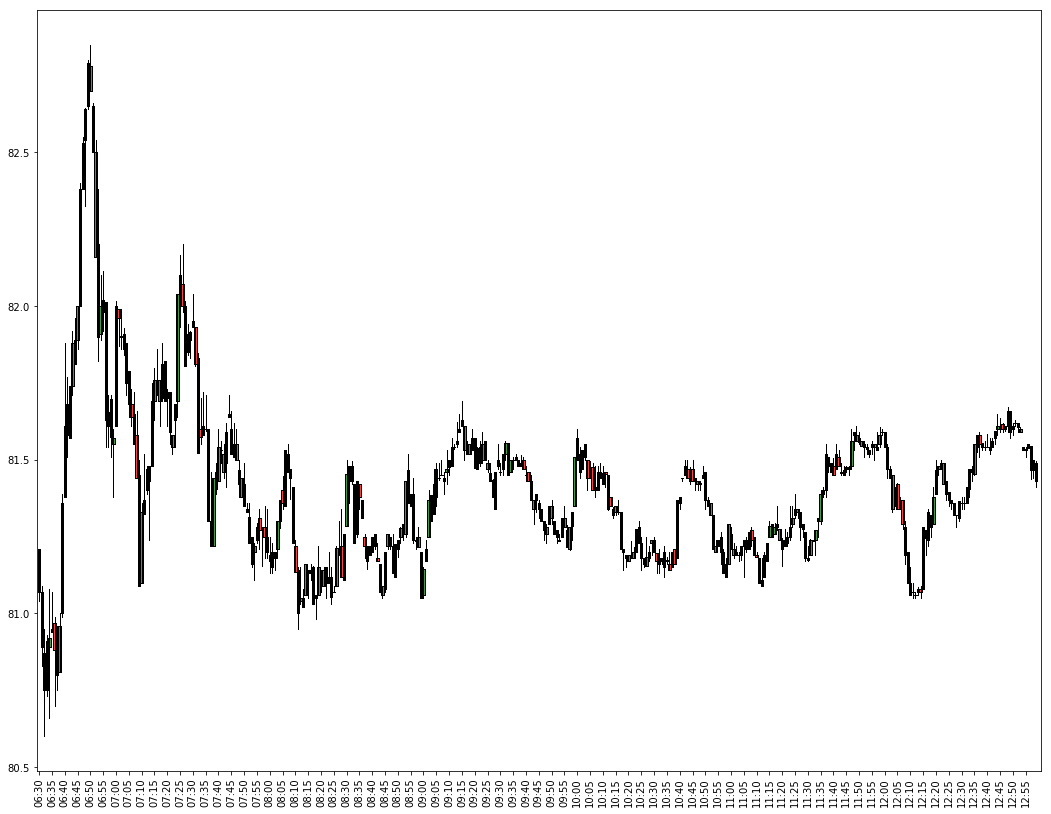

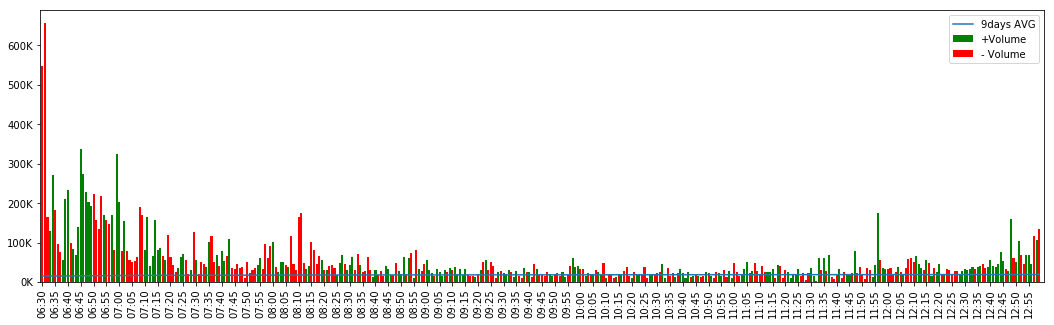

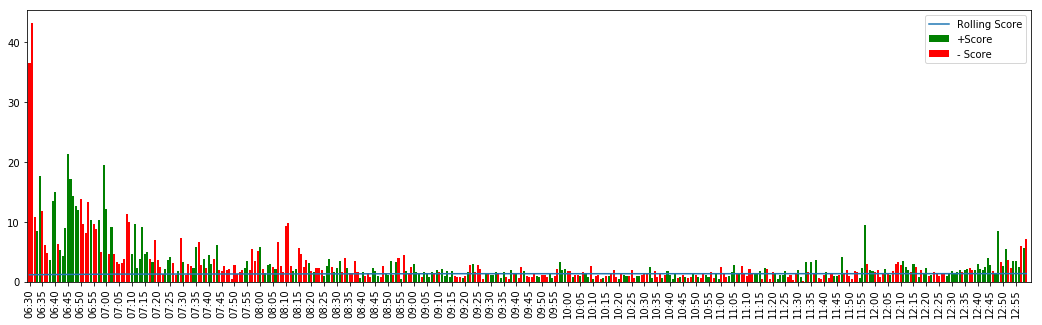

6. WTW 12:59PM: Rolling Score 1.9953804846942642, Current Score 6.21730937891595


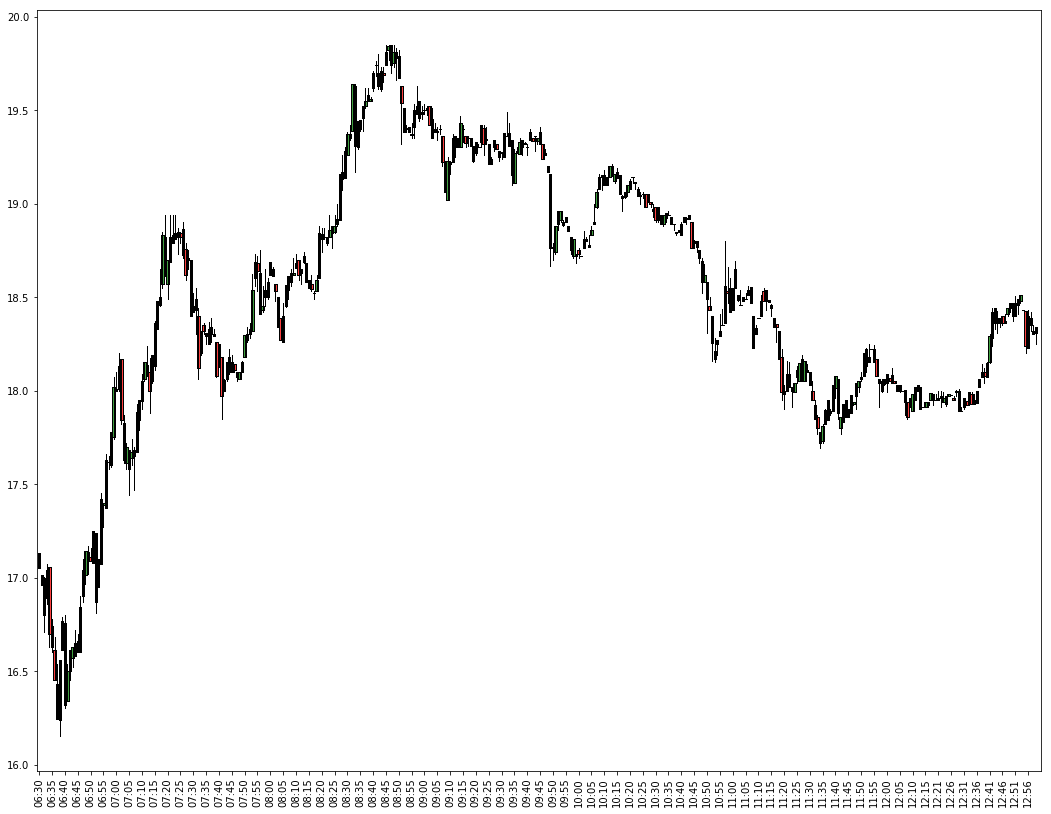

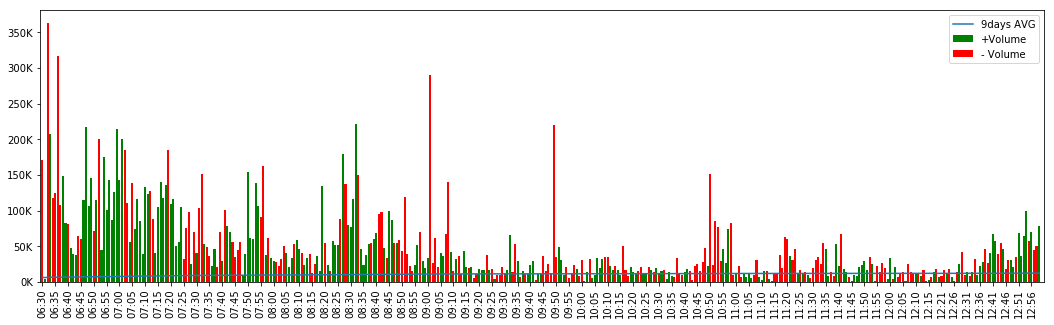

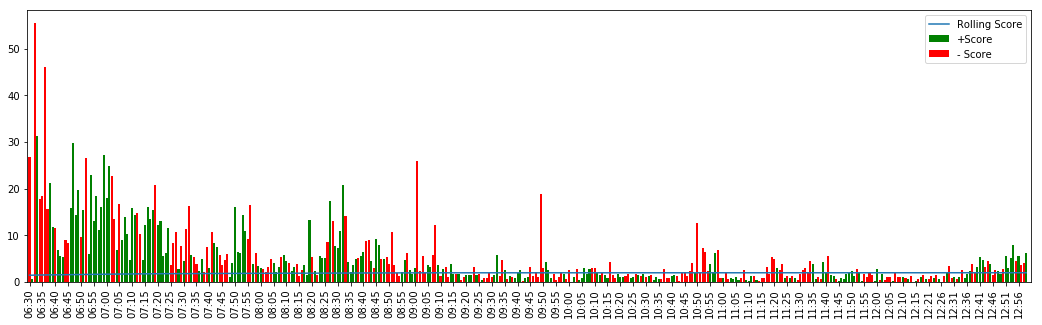

7. AAPL 12:59PM: Rolling Score 0.7441180815285036, Current Score 0.1644334262139229


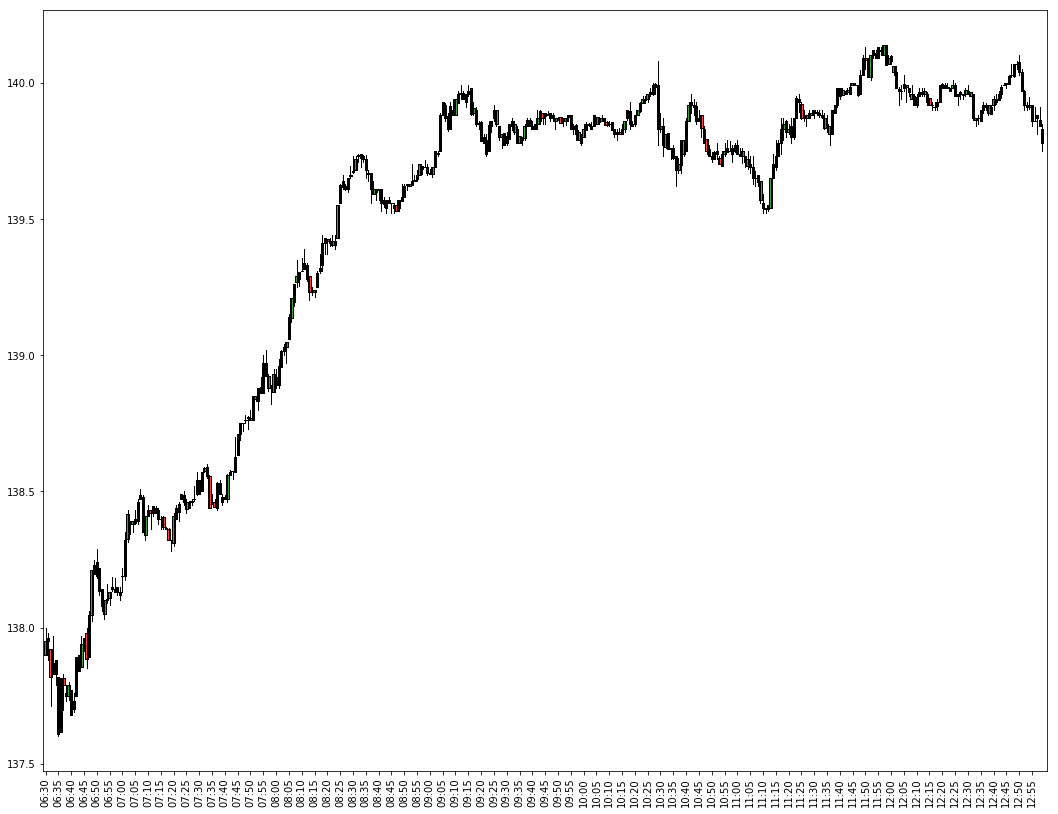

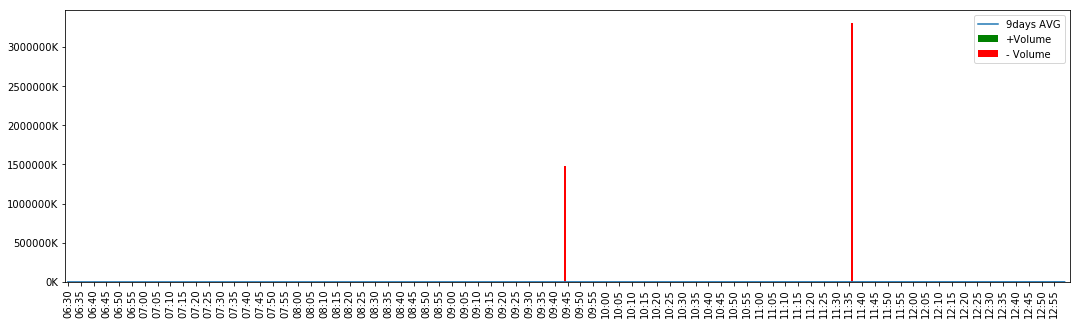

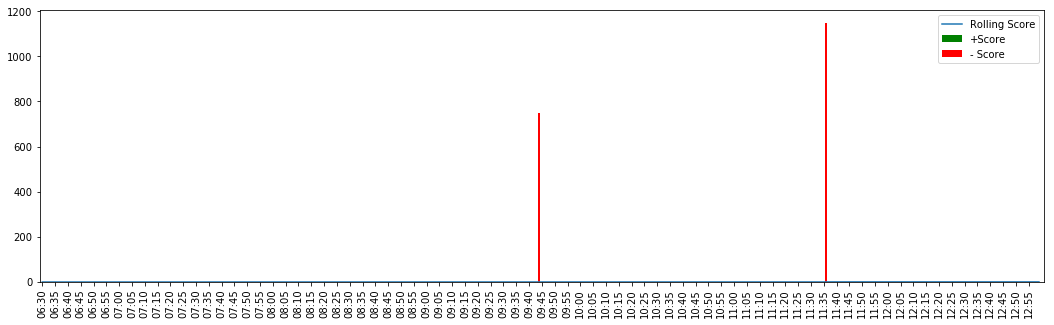

last update 2017-03-01 22:42:50.311740-08:00
prev update None
update time 0:00:53.600721


KeyboardInterrupt: 

In [43]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = 'America/Los_Angeles'
tz = pytz.timezone(LOCAL_TZ)
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None
start_date, end_date = None, None
while True:    
    now = datetime.now(tz=tz)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
        
        if end_date is None or start_date is None:
            start_date, end_date = get_trading_dates(now)  
            
        df = get_data_parallel(stocks, start_date, end_date)
        
        if df is not None:
            clear_output()
            current_time = df.time.max()
            last_minute_data = df[df.time == current_time]
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else:       
        start_date, end_date = None, None
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)